In [2]:
# initial setup
try:
    # settings colab:
    import google.colab
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

default checking
Running command `conda list`... ok
jupyterlab=1.2.6 already installed
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
psutil=5.7.0 already installed
scipy=1.4.1 already installed
statsmodels=0.11.0 already installed
scikit-learn=0.22.1 already installed
xlrd=1.2.0 already installed
nltk=3.4.5 already installed
unidecode=1.0.23 already installed
pydotplus=2.0.2 already installed


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import make_classification

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.metrics import accuracy_score

In [37]:
df = pd.read_csv('Data/COMERCIOS.TXT', sep='\t')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PERIODO                        26082 non-null  object 
 1   ID_ZONA                        26082 non-null  int64  
 2   RUBRO                          26082 non-null  object 
 3   NIVEL_RIESGO                   26082 non-null  int64  
 4   APERTURAS                      26082 non-null  float64
 5   CIERRES                        26082 non-null  float64
 6   SUPERVIVENCIA                  21473 non-null  float64
 7   PROMEDIO_VENTAS                26082 non-null  int64  
 8   NIVEL_CRECIMIENTO              23184 non-null  float64
 9   NIVEL_ESTABILIDAD              24843 non-null  float64
 10  CANTIDAD_LOCALES               26082 non-null  int64  
 11  SUPERV_MENOS_1                 26082 non-null  float64
 12  SUPERV_ENTRE_1_Y_2             26082 non-null 

In [10]:
df.columns.values

array(['PERIODO', 'ID_ZONA', 'RUBRO', 'NIVEL_RIESGO', 'APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'NIVEL_CRECIMIENTO',
       'NIVEL_ESTABILIDAD', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5', 'ANIO_ANTERIOR',
       'PROMEDIO_VENTAS_ANIO_ANTERIOR', 'APERTURAS_ANIO_ANTERIOR',
       'CIERRES_ANIO_ANTERIOR', 'TENDENCIA_APERTURAS',
       'TENDENCIA_CIERRES'], dtype=object)

In [40]:
df = df[['PERIODO', 'ID_ZONA', 'RUBRO', 'NIVEL_RIESGO', 'APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5']]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PERIODO             26082 non-null  object 
 1   ID_ZONA             26082 non-null  int64  
 2   RUBRO               26082 non-null  object 
 3   NIVEL_RIESGO        26082 non-null  int64  
 4   APERTURAS           26082 non-null  float64
 5   CIERRES             26082 non-null  float64
 6   SUPERVIVENCIA       21473 non-null  float64
 7   PROMEDIO_VENTAS     26082 non-null  int64  
 8   CANTIDAD_LOCALES    26082 non-null  int64  
 9   SUPERV_MENOS_1      26082 non-null  float64
 10  SUPERV_ENTRE_1_Y_2  26082 non-null  float64
 11  SUPERV_ENTRE_2_Y_3  26082 non-null  float64
 12  SUPERV_ENTRE_3_Y_4  26082 non-null  float64
 13  SUPERV_ENTRE_4_Y_5  26082 non-null  float64
 14  SUPERV_MAS_5        26082 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

PERIODO               0
ID_ZONA               0
RUBRO                 0
NIVEL_RIESGO          0
APERTURAS             0
CIERRES               0
SUPERVIVENCIA         0
PROMEDIO_VENTAS       0
CANTIDAD_LOCALES      0
SUPERV_MENOS_1        0
SUPERV_ENTRE_1_Y_2    0
SUPERV_ENTRE_2_Y_3    0
SUPERV_ENTRE_3_Y_4    0
SUPERV_ENTRE_4_Y_5    0
SUPERV_MAS_5          0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21473 entries, 0 to 26081
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PERIODO             21473 non-null  object 
 1   ID_ZONA             21473 non-null  int64  
 2   RUBRO               21473 non-null  object 
 3   NIVEL_RIESGO        21473 non-null  int64  
 4   APERTURAS           21473 non-null  float64
 5   CIERRES             21473 non-null  float64
 6   SUPERVIVENCIA       21473 non-null  float64
 7   PROMEDIO_VENTAS     21473 non-null  int64  
 8   CANTIDAD_LOCALES    21473 non-null  int64  
 9   SUPERV_MENOS_1      21473 non-null  float64
 10  SUPERV_ENTRE_1_Y_2  21473 non-null  float64
 11  SUPERV_ENTRE_2_Y_3  21473 non-null  float64
 12  SUPERV_ENTRE_3_Y_4  21473 non-null  float64
 13  SUPERV_ENTRE_4_Y_5  21473 non-null  float64
 14  SUPERV_MAS_5        21473 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 2.6+

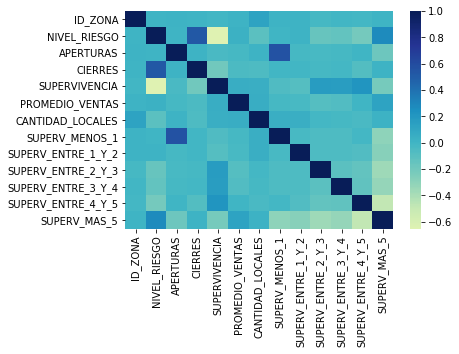

In [46]:
sns.heatmap(df.corr(), center=0, cmap="YlGnBu", annot=False);

In [47]:
df.head(3)

,PERIODO,ID_ZONA,RUBRO,NIVEL_RIESGO,APERTURAS,CIERRES,SUPERVIVENCIA,PROMEDIO_VENTAS,CANTIDAD_LOCALES,SUPERV_MENOS_1,SUPERV_ENTRE_1_Y_2,SUPERV_ENTRE_2_Y_3,SUPERV_ENTRE_3_Y_4,SUPERV_ENTRE_4_Y_5,SUPERV_MAS_5
0,Enero - Abril 2016,1,Bares y Cafés,2,0.00,0.0,0.00,1,2,0.00,100.00,0.00,0.00,0.00,0.00
1,Enero - Abril 2016,1,Carnes y Verduras,1,3.57,0.0,100.00,3,1,3.57,0.00,0.00,0.00,21.43,75.00
2,Enero - Abril 2016,1,Comida al Paso,2,2.56,0.0,58.82,3,2,5.13,7.69,10.26,5.13,10.26,61.54


In [48]:
df['NIVEL_RIESGO'].value_counts()

1    8186
2    7285
3    4338
4    1451
5     213
Name: NIVEL_RIESGO, dtype: int64

In [49]:
predecir = ['NIVEL_RIESGO']
features = ['ID_ZONA', 'RUBRO', 'APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5']

In [21]:
df['ID_ZONA'] = df['ID_ZONA'].astype(str)

In [50]:
df_final = pd.get_dummies(df[features], columns=['ID_ZONA', 'RUBRO'], drop_first=True)

In [51]:
X = df_final
y = df[predecir]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [54]:
X_train.shape

(16104, 188)

In [27]:
y_train.shape

(14173, 1)

In [59]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='newton-cg')

In [60]:
logistic_regression.fit(X_train_std, y_train.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred_test = logistic_regression.predict(X_test_std)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9510150866083069

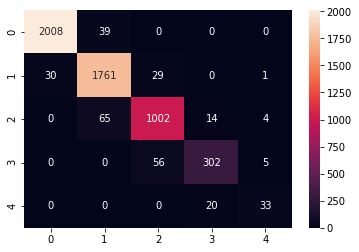

In [64]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')

In [69]:
df['NR'] = df['NIVEL_RIESGO'].astype(str)

In [77]:
columnas = ['APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5', 'NR']
columnas_vars = ['APERTURAS',
       'CIERRES', 'SUPERVIVENCIA']


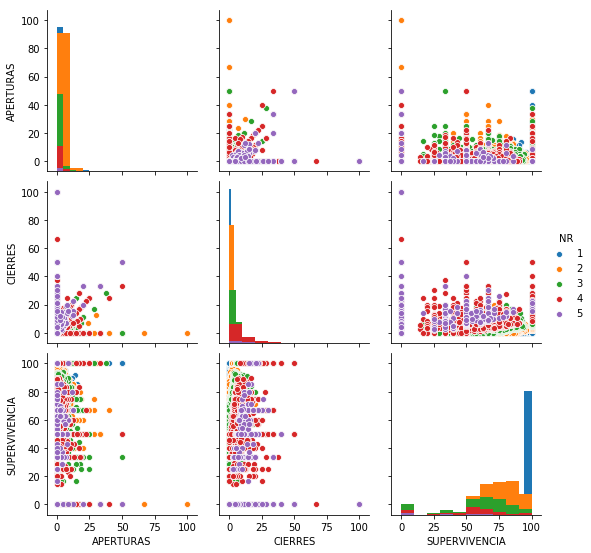

In [78]:
sns.pairplot(data=df[columnas], vars=columnas_vars, diag_kind='hist', hue='NR')

In [79]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [80]:
def scores_knn(X, y, start, stop, step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=3, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [85]:
df_scores= scores_knn(X_train_std, y_train.values.reshape(-1), 2, 6, 1)

In [86]:
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.564394,0.003213,2,0.561180,0.567607
1,0.537009,0.005348,3,0.531661,0.542358
2,0.540238,0.005151,4,0.535087,0.545390
3,0.531234,0.007161,5,0.524074,0.538395


In [87]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.564394,0.003213,2,0.56118,0.567607


In [88]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

2

In [89]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train_std, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [90]:
accuracy_score(y_train, model_knn.predict(X_train_std))

0.7963238946845504

In [91]:
y_pred_knn = model_knn.predict(X_test_std)

In [92]:
accuracy_score(y_test, y_pred_knn)

0.6071894207487428

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
gnb = GaussianNB()
gnb.fit(X_train_std, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
y_pred_nb = gnb.predict(X_test_std)

In [96]:
accuracy_score(y_test, y_pred_nb)

0.18811696777798473